# Práctica 6 (Complejidad Algoritmos)

* **Autor:** Axel Daniel Malváez Flores
* **Materia:** Matemáticas Discretas
* 5to semestre de la Licenciatura en Ciencia de Datos

In [7]:
import numpy as np
import time
import networkx as nx

import matplotlib.pyplot as plt

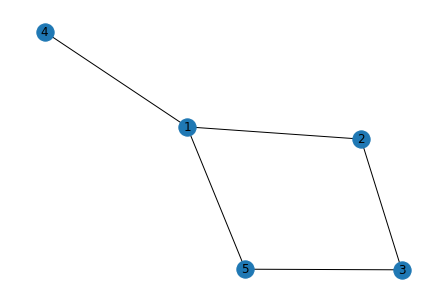

In [8]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(4,1)
G.add_edge(1,5)
G.add_edge(5,3)
nx.draw(G, with_labels=True)

# Ejercicios

## Ejercicio 1

Como notamos en clase, la representación de matriz de adyacencia y lista de adyacencia es redundante para gráficas no-dirigidas. En el caso de la matriz de adyacencia, la siguiente matriz es equivalente a la de nuestro ejemplo:

$$
\begin{pmatrix}
0 & & & & \\
1 & 0 & & & \\
1 & 0 & 0 & & \\
0 & 1 & 0 & 0 & \\
1 & 0 & 0 & 1 & 0 \\
\end{pmatrix}
$$

Análogamente, nuestra lista de adyacencia puede reducirse a la siguiente forma:

```
0: 1, 2, 4
1: 3
2: 
3: 4
4: 
```

---

Asumiendo que tenemos estas representaciones para una gráfica en general, explica cómo cambiaría (si es que lo hace) la complejidad en tiempo y espacio del algoritmo DFS.

Tenemos que nuestro algoritmo DFS es el siguiente:

```
def dfs(g, v, visited=None):
    if visited is None:
        visited = [False] * len(g.nodes)
        
    visited[v] = True
    print(v) # Aquí puede ir cualquier otra cosa
    for u in g.adj[v]:
        if not visited[u]:
            dfs(g, u, visited)
```

### Matriz de Adyacencia

Para la matriz de adyacencia primero notemos que si tenemos la matriz de la siguiente forma no funciona si tomamos a los vecinos por filas, en este caso deberían de ser por columnas así la matriz es

$$
\begin{pmatrix}
0 & & & & \\
1 & 0 & & & \\
1 & 0 & 0 & & \\
0 & 1 & 0 & 0 & \\
1 & 0 & 0 & 1 & 0 \\
\end{pmatrix}
$$

entonces, para poder operar con matrices de este tipo tendremos dos casos, el **primero** es simplemente asignar a los lugares donde no hay valores, ceros, para que al momento de obtener a los vecinos de un vértice, obtengamos la columna correspondiente a ese vértice, un ejemplo con la matriz anterior es el siguiente:

$$
\begin{pmatrix}
0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
1 & 0 & 0 & 1 & 0 \\
\end{pmatrix}
$$

* Tiempo: La complejidad en tiempo en el peor caso seguría siendo $O(n^2)$ debido a que para conocer los vecinos de un nodo, tenemos que seguir revisando cada entrada de la columna correspondiente a ese nodo en la matriz lo cual toma $O(n)$ y como se hace para cada nodo en la gráfica entonces de ahí concluimos el $O(n^2)$, no obstante tenemos que el número de iteraciones del ```for``` e ```if``` que realiza el algoritmo es menor que si utilizamos una matriz simétrica.

para el **segundo** caso tenemos que si nuestra matriz en lugar de ser rellenada los valores faltantes con ceros, utilizamos el $NA$ de numpy, podemos obtener los vecinos de un nodo con un ciclo while que itere sobre la columna correspondiente a ese nodo de abajo hacia arriba y que pare hasta que se encuentre con un $NA$, un ejemplo de esta matriz es la siguiente:

$$
\begin{pmatrix}
0 & NA & NA & NA & NA \\
1 & 0 & NA & NA & NA \\
1 & 0 & 0 & NA & NA \\
0 & 1 & 0 & 0 & NA \\
1 & 0 & 0 & 1 & 0 \\
\end{pmatrix}
$$


* Tiempo: La complejidad en tiempo en el peor caso de este nuevo algoritmo está en que para el nodo $0$ tendremos que revisar cada entrada de la columna correspondiente a ese nodo lo cual se hace en $n$ operaciones, para el nodo $1$ revisaremos su entrada en la fila y nos tomará $n-1$ operaciones y así sucesivamente hasta llegar al nodo $n$ que hace $0$ operaciones, por lo que al sumar los pasos $n + (n-1) + (n-2) + ... + 1 + 0$ sabemos que es igual a $\frac{n(n+1)}{2} = \frac{n^2 + n}{2} = \frac{1}{2} n^2 + n$ lo cual sigue siendo $O(n^2)$, por lo que la complejidad se mantiene, no obstante al obtener los vecinos no iteramos sobre toda la fila del nodo y además el número de iteraciones del ```for``` e ```if``` que realiza el algoritmo es menor que si utilizamos una matriz simétrica.

En ambos casos resulta ser que la complejidad en espacio es:

* Espacio: En el peor de los casos haremos $n$ llamadas recursivas anidadas (esto si nuestra gráfica resulta convertirse en una lista). Por lo que la altura máxima de la pila de llamadas es $n$ y por tanto la complejidad en espacio será $O(n)$.


### Lista de Adyacencia

* Tiempo: La complejidad en tiempo en el peor caso se da cuando tenemos una gráfica completa pues para obtener todos los vecinos del nodo $0$ tendremos que revisar cada entrada de su lista de nodos que serían $n-1$, para el nodo $1$ revisaríamos $n-2$ entradas y así sucesivamente hasa llegar al nodo $n$ que revisaríamos $0$ entradas, es decir revisamos en total $(n-1) + (n-2) + ... + 1 + 0$ entradas, pero esto sabemos que es $\frac{(n-1)n}{2} = \frac{n^2 - n}{2} = \frac{1}{2} n^2 - n$ lo cual nos indica que sigue siendo de $O(n^2)$, por lo que la complejidad se mantiene, no obstante hacemos menos iteraciones en el ```for```e ```if ```.

* Espacio: En el peor de los casos haremos $n$ llamadas recursivas anidadas (esto si nuestra gráfica resulta convertirse en una lista). Por lo que la altura máxima de la pila de llamadas es $n$ y por tanto la complejidad en espacio será $O(n)$.

## Ejercicio 2

Podemos definir el máximo común divisor de $a$ y $b$ de manera recursiva de la siguiente manera:

$$
\text{mcd}(a, b) = 
\begin{cases}
a, & \text{si}\ b=0 \\
\text{mcd}(b, a\mod b), & \text{en otro caso} 
\end{cases}
$$

Escribe una función que utilice esta definición para calcular el MCD de manera recursiva. Posteriormente, escribe otra que lo haga de manera iterativa. Explica la complejidad en tiempo y espacio de ambas.

Recursivo

In [9]:
def mcd_rec(a,b):
    if b == 0:
        return a
    else:
        return mcd_rec(b,a%b)

Tenemos que el análisis del algoritmo es el siguiente:

* Tiempo: Demostraremos que la complejidad del algoritmo es $O(log(min(a,b)))$  

    Como este algoritmo termina cuando tenemos que b es 0 y lo que hace el algoritmo es ir reduciendo la entrada de $b$, entonces intuitivamente es ir reduciendo de una serie de números en uno anterior. Notemos que el peor caso que nos podemos encontrar es que tengamos que calcular el mcd dos números consecutivos de Fibonacci, pues estos son siempre primos relativos, es decir que 1 es su único divisor común. Esto pues si $a = F_{n+1}$ y $ b = F_n$ donde $F_n$ representa al número en la posición $n$ en la sucesión de Fibonacci, tenemos que:
    $$ mcd(F_{n+1},F_n)=mcd(F_n,F_{n+1} \ mod \ F_n)$$
    $$ = mcd(F_n,F_{n} + F_{n-1} \ mod \ F_n) $$
    $$ = mcd(F_n,F_{n-1}) $$

    Esta última igualdad se da ya que para todo $a,b$ enters, tenemos que $a+b \ mod \ \ b = a \ mod \ b $. No obstante como sabemos que $F_{n-1} < F_n $ entonces por propiedades del módulo en particular del residuo, tenemos que $F_{n} + F_{n-1} \ mod \ F_n = F_{n-1} mod F_{n} = F_{n-1}$.  

    Entonces tenemos que $mcd(F_{n+1},F_n)= mcd(F_n,F_{n-1})$, por lo que estaremos reduciendo a la sucesión de Fibonacci hasta que lleguemos a $b=0$ que es donde se detiene el algoritmo, y esto sucede hasta que $n=0$, es decir llegamos a $F_0 = 0$. Y al ir reduciendo de uno en uno entonces tenemos que la complejidad es de $O(n)$. No obstante como la sucesión de Fibonacci no es secuencial, entonces tenemos que basarnos en la complejidad del algoritmo que calcula esta serie.
    

    Como ya sabíamos la serie de Fibonacci se da por la siguiente fórmula:
    $$
    F_n = \frac{(\frac{1 + \sqrt{5}}{2})^n - (\frac{1- \sqrt{5}}{2})^n}{\sqrt{5}}
    $$  

    Tendremos que la complejidad de calcular $F_n$ es $O(\varphi^n)$ donde $\varphi$ es la proporción aurea y como sabemos que el número $F_n$ de Fibonacci es menor a $\phi^n$, entonces $F_n \leq  \varphi^n$ lo que implica pues son equitativos a que $ n \leq log_{\varphi}(F_n)$. Por lo tanto como $n$ es menor o igual a $log_{\varphi}(F_n)$ y como la complejidad de nuestro algoritmo de arriba es $O(n)$, a lo mucho $n$ es $log_{\varphi}(F_n)$, por lo que la complejidad en el peor caso del algoritmo $mcd$ será de $O(log(n))$

* Espacio: Como la pila de recursión crece tantas veces como llamamos a nuestro algoritmo y este tiene a lo más complejidad $O(log(n))$, entonces la complejidad en espacio será la misma.

Iterativo

In [10]:
def mcd_iter(a,b):
    while b != 0 :
        a,b = b, a % b
    return a

* Tiempo: Como el algoritmo se detiene hasta que $b=0$ y al ir reduciendo a $b$ de manera similar, tendremos que el while se ejecutará en $O(log(n))$ pasos pues al igual que en el caso anterior, el peor caso para el algoritmo se da cuando $a$ y $b$ resultan ser números de Fibonacci consecutivos.

* Espacio: En este caso dado que es iterativo nos fijamos en aquellas variables que estamos utilizando y al ser variables que solo guardan números, entonces tenemos que para el caso iterativo la complejidad en espacio es de $O(1)$

## Ejercicio 3

Escribe una función recursiva que determine si un *string* dado es un palíndromo o no. Luego, haz lo mismo de manera iterativa. Analiza la complejidad en tiempo y espacio de ambas.

Recursivo

In [11]:
def es_palindromo_rec(a):
    a = a.replace(' ','')
    if len(a) == 1:
        return print('Si es palíndromo')
    elif len(a) == 0:
        return print('Si es palíndromo')
    else:
        if a[0] == a[-1]:
            aux = a[1:len(a) - 1]
            es_palindromo_rec(aux)
        else:
            return print('No es palíndromo')

* Tiempo: El número de pasos se da en función de la longitud de la cadena dada como entrada, si esta es $n$ (ya sin espacios) este algoritmo recursivo se ejecutará $n/2$ veces (esto en el caso de que la palabra sea palíndroma y cada iteración vaya acortando la cadena de dos en dos, entonces al analizar la nueva lista el algoritmo la cadena nueva tendrá longitud $n-2$ y después $n-4$ y así sucesivamente hasta llegar a una longitud 0 ó 1). Entonces haremos $n/2$ pasos y por lo tanto la complejidad del algoritmo será de $O(\frac{n}{2}) = O(n)$.

* Espacio: Como la pila de ejecución crece tantas veces como el peor caso en la cantidad de pasos ocurra, es decir ocurran $n/2$ pasos, por lo tanto la complejidad en espacio será de $O(\frac{n}{2}) = O(n)$

Iterativo

In [12]:
def es_palindromo_iter(a):
    a = a.replace(' ','')
    inicio = 0 
    fin = len(a) - 1
    while inicio < fin :
        if a[inicio] != a[fin] :
            return print('No es un palíndromo.')
        inicio += 1
        fin -= 1
    return print(f'Si es palíndromo.')

* Tiempo: Notemos que el ciclo *while* tendrá a lo más $n/2$ iteraciones (esto pues vamos recortando la palabra de dos en dos en cada iteración por lo que al final llegaremos a una longitud de 1 ó 0) por lo que el algoritmo tendrá una complejidad de $O(\frac{n}{2}) = O(n)$.
    
* Espacio: Como el algoritmo solo guarda las variables a, inicio y fin y además en el ciclo únicamente las actualizamos, entonces tenemos que la complejidad en espacio se mantiene en cada iteración y por tanto es constante, es decir de $O(1)$.